In [1]:
!pip install wordcloud

In [2]:
!pip install textblob

In [1]:
# ==============================
# 1. Setup & Load Data
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Load dataset
df = pd.read_excel("Mount Alvernia hospital.xlsx")

# Display basic info
print(df.shape)
df.head()

(443, 35)


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2xOSU9UVlROVGRxYVhGTV...,CAESYENBRVFBUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMk...,...,4,1755854070,08/22/2025 09:14:30,NaN,-7398584239094758513,124,21,17,73,208
1,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2pkaWEzUnBOMWRPYWxZMV...,CAESYENBRVFBaHBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMk...,...,3,1755852758,08/22/2025 08:52:38,NaN,-7398584239094758513,124,21,17,73,208
2,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2tOU1RWTlpSRmxtYVVoUk...,CAESY0NBRVFBeHBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMk...,...,2,1755657053,08/20/2025 02:30:53,NaN,-7398584239094758513,124,21,17,73,208
3,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2xCTVgxbzRjazU1Y2tsc2...,CAESY0NBRVFCQnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMk...,...,1,1755646525,08/19/2025 23:35:25,NaN,-7398584239094758513,124,21,17,73,208
4,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT25RMGJXZG5NVzlNU1hCTU...,CAESY0NBRVFCUnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMl...,...,5,1755270597,08/15/2025 15:09:57,NaN,-7398584239094758513,124,21,17,73,208


In [2]:
df.columns

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews', 'rating', 'review_id',
       'review_pagination_id', 'author_link', 'author_title', 'author_id',
       'author_image', 'author_reviews_count', 'author_ratings_count',
       'review_text', 'review_img_urls', 'review_img_url', 'review_questions',
       'review_photo_ids', 'owner_answer', 'owner_answer_timestamp',
       'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating',
       'review_timestamp', 'review_datetime_utc', 'review_likes', 'reviews_id',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   query                                443 non-null    object 
 1   name                                 443 non-null    object 
 2   google_id                            443 non-null    object 
 3   place_id                             443 non-null    object 
 4   location_link                        443 non-null    object 
 5   reviews_link                         443 non-null    object 
 6   reviews                              443 non-null    int64  
 7   rating                               443 non-null    float64
 8   review_id                            443 non-null    object 
 9   review_pagination_id                 442 non-null    object 
 10  author_link                          443 non-null    object 
 11  author_title                    

In [4]:
# ==============================
# 2. Data Cleaning
# ==============================
# Remove duplicates
df = df.drop_duplicates()

# Convert datetime column
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')

# Add review text length
df['review_length'] = df['review_text'].astype(str).apply(len)

# Check missing values
print(df.isna().sum())


query                                    0
name                                     0
google_id                                0
place_id                                 0
location_link                            0
reviews_link                             0
reviews                                  0
rating                                   0
review_id                                0
review_pagination_id                     1
author_link                              0
author_title                             0
author_id                                0
author_image                             0
author_reviews_count                     0
author_ratings_count                     0
review_text                            126
review_img_urls                        415
review_img_url                         415
review_questions                       443
review_photo_ids                       415
owner_answer                           416
owner_answer_timestamp                 416
owner_answe

In [5]:
# ==============================
# 3. Descriptive Statistics
# ==============================
print(df['review_rating'].describe())
print(df['review_length'].describe())

print("Reviewer reviews count stats:")
print(df['author_reviews_count'].describe())

print("Reviewer ratings count stats:")
print(df['author_ratings_count'].describe())

print("Owner response rate:", df['owner_answer'].notna().mean())


count    443.000000
mean       3.496614
std        1.723372
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: review_rating, dtype: float64
count     443.000000
mean      338.790068
std       548.569814
min         3.000000
25%         3.000000
50%       148.000000
75%       437.500000
max      4093.000000
Name: review_length, dtype: float64
Reviewer reviews count stats:
count     443.000000
mean       86.309255
std       288.649393
min         0.000000
25%         4.000000
50%        14.000000
75%        57.000000
max      4528.000000
Name: author_reviews_count, dtype: float64
Reviewer ratings count stats:
count     443.000000
mean       38.683973
std       168.959926
min         0.000000
25%         1.000000
50%         3.000000
75%        14.000000
max      2535.000000
Name: author_ratings_count, dtype: float64
Owner response rate: 0.060948081264108354


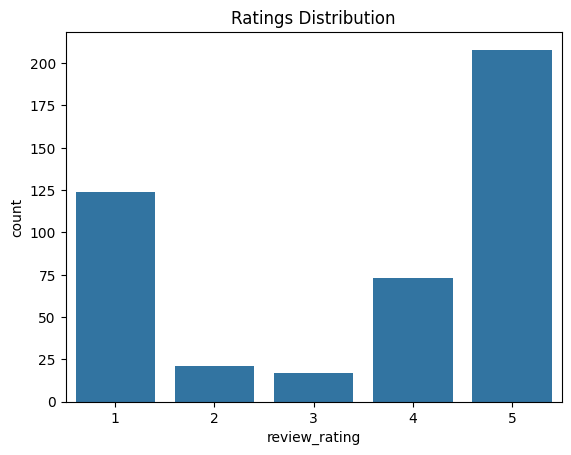

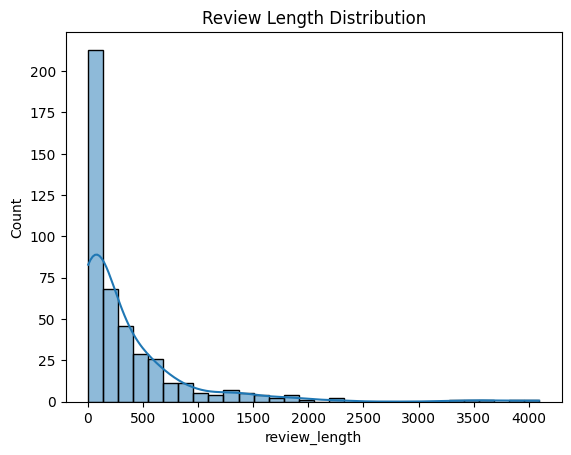

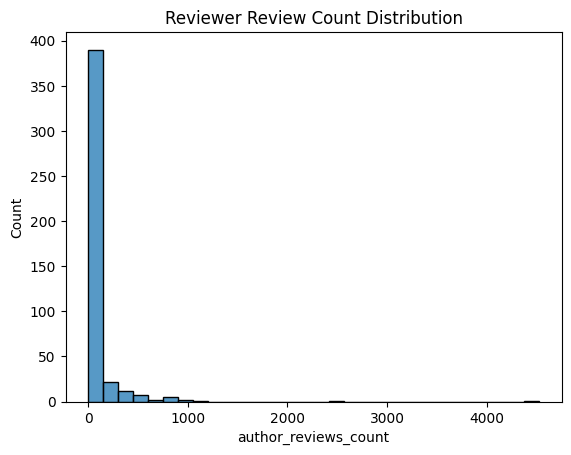

In [6]:
# ==============================
# 4. Univariate Analysis
# ==============================
sns.countplot(x='review_rating', data=df)
plt.title("Ratings Distribution")
plt.show()

sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Review Length Distribution")
plt.show()

sns.histplot(df['author_reviews_count'], bins=30)
plt.title("Reviewer Review Count Distribution")
plt.show()


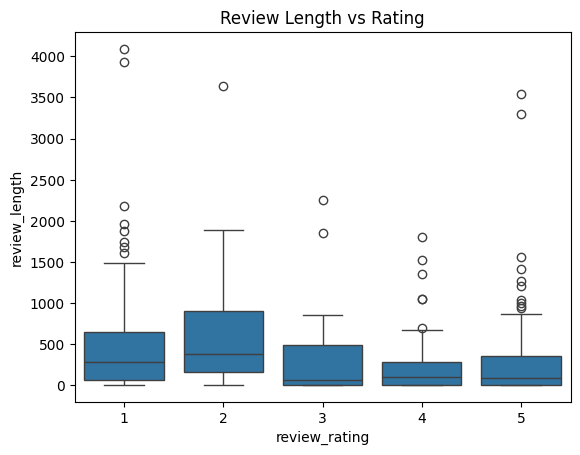

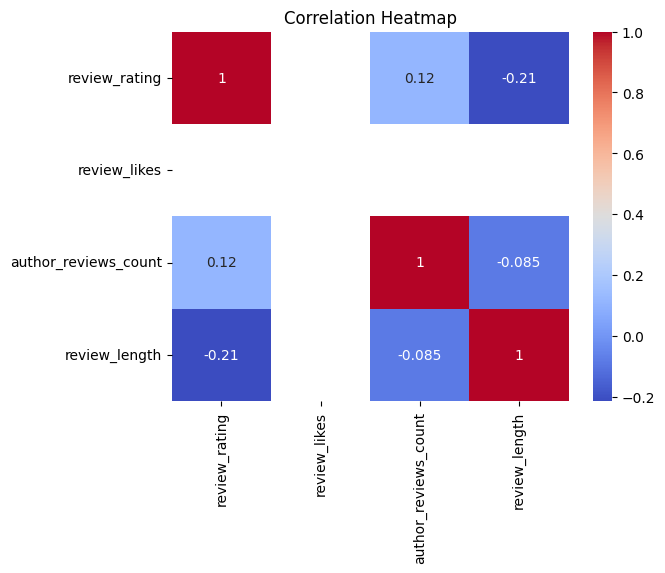

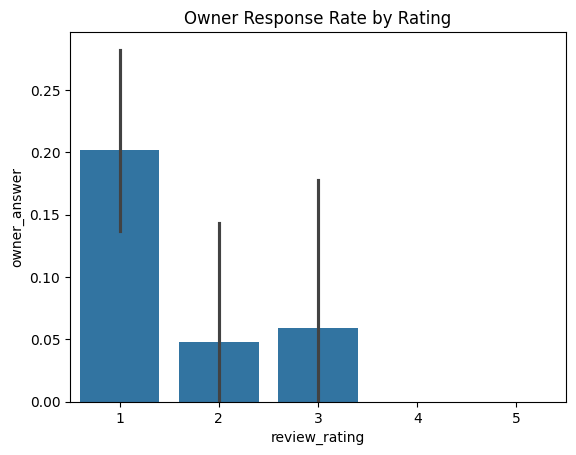

In [7]:
# ==============================
# 5. Bivariate Analysis
# ==============================
sns.boxplot(x='review_rating', y='review_length', data=df)
plt.title("Review Length vs Rating")
plt.show()

sns.heatmap(df[['review_rating','review_likes','author_reviews_count','review_length']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.barplot(x='review_rating', y=df['owner_answer'].notna(), data=df, estimator=np.mean)
plt.title("Owner Response Rate by Rating")
plt.show()


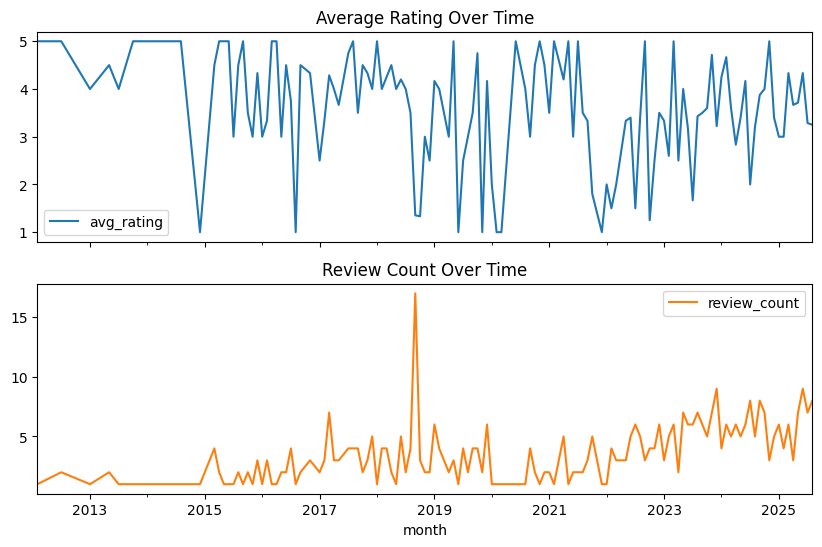

In [8]:
# ==============================
# 6. Time-based Analysis
# ==============================
df['month'] = df['review_datetime_utc'].dt.to_period("M")

monthly = df.groupby('month').agg(
    avg_rating=('review_rating','mean'),
    review_count=('review_rating','count')
)

monthly.plot(y=['avg_rating','review_count'], subplots=True, figsize=(10,6),
             title=["Average Rating Over Time","Review Count Over Time"])
plt.show()


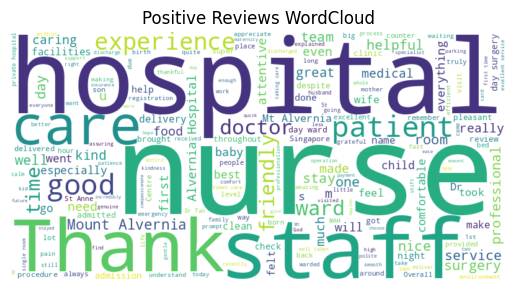

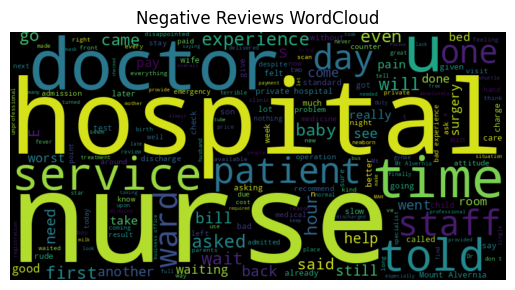

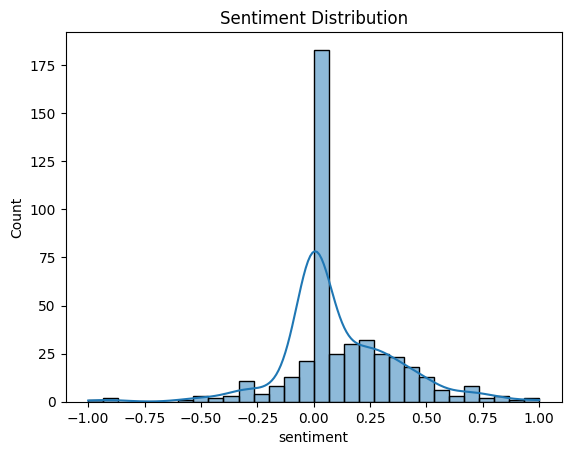

In [9]:
# ==============================
# 7. Text Analysis (WordCloud + Sentiment)
# ==============================
# Positive reviews wordcloud
positive_text = " ".join(df[df['review_rating'] >= 4]['review_text'].dropna())
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

# Negative reviews wordcloud
negative_text = " ".join(df[df['review_rating'] <= 2]['review_text'].dropna())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews WordCloud")
plt.show()

# Sentiment polarity
df['sentiment'] = df['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.show()


Top Reviewers:
author_title
Jan                    2
Remelyn Pallingayan    1
Regine Lee             1
Ratna Megawati         1
Raine Goh              1
RONGRONG WENG          1
ROBERT C.S. TAY        1
RICO Lee               1
R. Keung               1
R                      1
dtype: int64


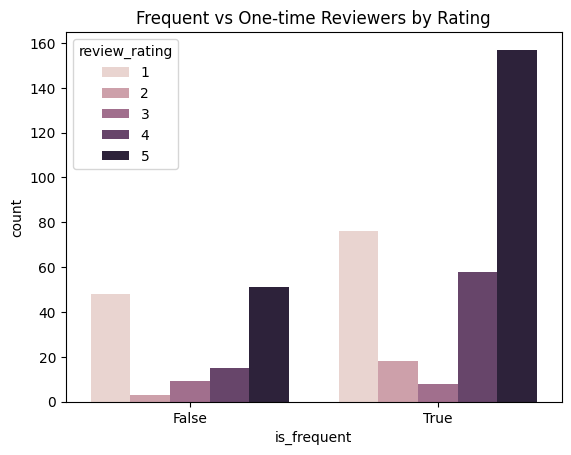

In [10]:
# ==============================
# 8. Reviewer Insights
# ==============================
top_reviewers = df.groupby('author_title').size().sort_values(ascending=False).head(10)
print("Top Reviewers:")
print(top_reviewers)

df['is_frequent'] = df['author_reviews_count'] > 5
sns.countplot(x='is_frequent', hue='review_rating', data=df)
plt.title("Frequent vs One-time Reviewers by Rating")
plt.show()


In [11]:
# ==============================
# 9. Owner Response Analysis
# ==============================
neg = df[df['review_rating'] <= 2]
pos = df[df['review_rating'] >= 4]

print("Response rate for negative reviews:", neg['owner_answer'].notna().mean())
print("Response rate for positive reviews:", pos['owner_answer'].notna().mean())


Response rate for negative reviews: 0.1793103448275862
Response rate for positive reviews: 0.0


In [12]:
# ==============================
# 10. Aggregate Check
# ==============================
agg_counts = {
    "1_star": df['reviews_per_score_1'].iloc[0],
    "2_star": df['reviews_per_score_2'].iloc[0],
    "3_star": df['reviews_per_score_3'].iloc[0],
    "4_star": df['reviews_per_score_4'].iloc[0],
    "5_star": df['reviews_per_score_5'].iloc[0],
}
print("Aggregated counts from metadata:", agg_counts)

actual_counts = df['review_rating'].value_counts()
print("Actual counts from reviews:", actual_counts)


Aggregated counts from metadata: {'1_star': 124, '2_star': 21, '3_star': 17, '4_star': 73, '5_star': 208}
Actual counts from reviews: review_rating
5    208
1    124
4     73
2     21
3     17
Name: count, dtype: int64


#### 🏥 Google Reviews EDA + NLP Extension

In [13]:
# ==============================
# 11. Keyword Extraction (TF-IDF)
# ==============================
from sklearn.feature_extraction.text import TfidfVectorizer

# Use only non-null review text
texts = df['review_text'].dropna().astype(str)

# Vectorize reviews
tfidf = TfidfVectorizer(stop_words='english', max_features=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(texts)

# Top keywords
keywords = pd.DataFrame({
    "keyword": tfidf.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
}).sort_values(by="score", ascending=False)

print("Top Keywords (TF-IDF):")
print(keywords.head(20))


Top Keywords (TF-IDF):
       keyword      score
7     hospital  69.999153
15       staff  40.855664
12      nurses  40.658625
6         good  30.511312
5   experience  29.250566
14     service  26.299142
1         care  26.203431
19        ward  25.329341
11       nurse  25.328980
0     alvernia  22.130515
3       doctor  21.484870
18        time  20.690734
16     surgery  19.906174
17       thank  18.270738
13     patient  18.246380
10       mount  17.776889
9         like  17.653533
2          day  17.577060
8         just  15.901882
4           dr  11.730378


In [14]:
# ==============================
# 12. Topic Modeling (LDA)
# ==============================
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Count vectorizer for LDA
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
cv_matrix = cv.fit_transform(texts)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")

display_topics(lda, cv.get_feature_names_out())


Topic 1:
hospital | nurses | staff | alvernia | service | care | ward | good | st | patient


Topic 2:
hospital | staff | nurses | doctor | alvernia | service | medical | time | surgery | experience


Topic 3:
nurse | nurses | asked | just | doctor | care | ward | experience | did | dr


Topic 4:
hospital | bus | shuttle | good | parking | wait | rude | hour | rooms | fever


Topic 5:
hospital | wait | ward | day | staff | told | registration | time | room | like




/var/tmp/ipykernel_5159/1274790882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['dominant_topic'] = topic_values.argmax(axis=1)


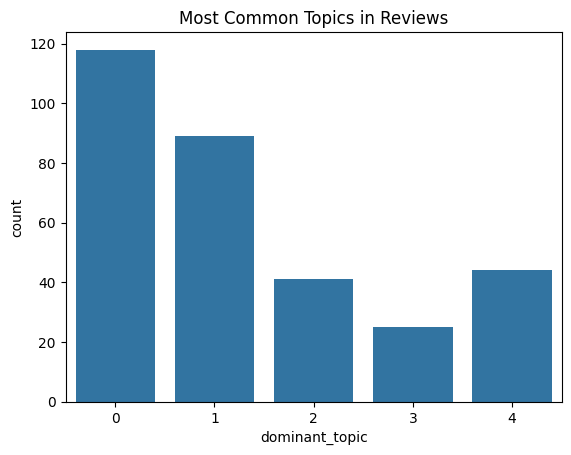

In [15]:
# ==============================
# 13. Topic Distribution per Review
# ==============================
topic_values = lda.transform(cv_matrix)

# Create a new DataFrame with the same index as cv_matrix to ensure alignment
# This assumes cv_matrix was created from a subset of df
df_subset = df.iloc[cv_matrix.index] if hasattr(cv_matrix, 'index') else df.head(len(topic_values))

# Add dominant topic to this subset
df_subset['dominant_topic'] = topic_values.argmax(axis=1)

# Plot with the correctly aligned data
sns.countplot(x='dominant_topic', data=df_subset)
plt.title("Most Common Topics in Reviews")
plt.show()

# Alternatively, if you need to keep the original df intact:
# Create a temporary DataFrame for plotting
# temp_df = pd.DataFrame({'dominant_topic': topic_values.argmax(axis=1)})
# sns.countplot(x='dominant_topic', data=temp_df)

# Assistant
This error occurs because the length of the `topic_values` array (146) doesn't match the length of your DataFrame `df` (185). This mismatch happens when you try to assign the `dominant_topic` column to your DataFrame.

The most likely cause is that your `cv_matrix` (CountVectorizer or TF-IDF matrix) was created using a subset of your data, or some rows were filtered out during preprocessing (perhaps due to empty reviews after text cleaning).

Would you like me to provide the corrected code?

# KPI Metrics

In [16]:
import pandas as pd
import numpy as np
from textblob import TextBlob

# Ensure datetime and review length are present
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')
df['review_length'] = df['review_text'].astype(str).apply(len)
df['sentiment'] = df['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)


# ⭐ 1. Ratings-Based Metrics

In [17]:
# Average rating
avg_rating = df['review_rating'].mean()
median_rating = df['review_rating'].median()
rating_distribution = df['review_rating'].value_counts(normalize=True) * 100

print("Average Rating:", avg_rating)
print("Median Rating:", median_rating)
print("Rating Distribution (%):\n", rating_distribution)

# Trend over time (monthly)
df['month'] = df['review_datetime_utc'].dt.to_period("M")
rating_trend = df.groupby('month')['review_rating'].mean()
print("Monthly Rating Trend:\n", rating_trend.tail())


Average Rating: 3.4966139954853275
Median Rating: 4.0
Rating Distribution (%):
 review_rating
5    46.952596
1    27.990971
4    16.478555
2     4.740406
3     3.837472
Name: proportion, dtype: float64
Monthly Rating Trend:
 month
2025-04    3.666667
2025-05    3.714286
2025-06    4.333333
2025-07    3.285714
2025-08    3.250000
Freq: M, Name: review_rating, dtype: float64


# 💬 2. Sentiment Metrics

In [18]:
avg_sentiment = df['sentiment'].mean()
sentiment_distribution = pd.cut(df['sentiment'], bins=[-1,-0.05,0.05,1], labels=["Negative","Neutral","Positive"]).value_counts(normalize=True) * 100

print("Average Sentiment Score:", avg_sentiment)
print("Sentiment Distribution (%):\n", sentiment_distribution)

# Correlation with rating
corr_sentiment_rating = df[['review_rating','sentiment']].corr().iloc[0,1]
print("Correlation between Sentiment & Rating:", corr_sentiment_rating)


Average Sentiment Score: 0.11072297347794328
Sentiment Distribution (%):
 sentiment
Positive    44.570136
Neutral     43.891403
Negative    11.538462
Name: proportion, dtype: float64
Correlation between Sentiment & Rating: 0.469945667621553


# ✍️ 3. Review Quality & Engagement

In [19]:
avg_review_length = df['review_length'].mean()
avg_likes = df['review_likes'].mean(skipna=True)

print("Average Review Length:", avg_review_length)
print("Average Likes per Review:", avg_likes)

# Length vs rating
length_by_rating = df.groupby('review_rating')['review_length'].mean()
print("Review Length by Rating:\n", length_by_rating)


Average Review Length: 338.7900677200903
Average Likes per Review: nan
Review Length by Rating:
 review_rating
1    481.750000
2    719.095238
3    408.176471
4    234.657534
5    246.043269
Name: review_length, dtype: float64


# 👥 4. Reviewer Behavior

In [20]:
# One-time vs frequent
one_time_reviewers = (df['author_reviews_count'] == 1).mean() * 100
frequent_reviewers = (df['author_reviews_count'] > 5).mean() * 100

print("One-time Reviewers (%):", one_time_reviewers)
print("Frequent Reviewers (%):", frequent_reviewers)

# Reviewer bias (avg rating by reviewer type)
df['is_frequent'] = df['author_reviews_count'] > 5
bias = df.groupby('is_frequent')['review_rating'].mean()
print("Avg Rating by Reviewer Type:\n", bias)


One-time Reviewers (%): 5.417607223476298
Frequent Reviewers (%): 71.55756207674943
Avg Rating by Reviewer Type:
 is_frequent
False    3.142857
True     3.637224
Name: review_rating, dtype: float64


# 🔁 5. Owner Response Metrics

In [21]:
# Overall response rate
response_rate = df['owner_answer'].notna().mean() * 100

# Response rate by rating
response_by_rating = df.groupby('review_rating')['owner_answer'].apply(lambda x: x.notna().mean()*100)

# Response by sentiment
df['sentiment_group'] = pd.cut(df['sentiment'], bins=[-1,-0.05,0.05,1], labels=["Negative","Neutral","Positive"])
response_by_sentiment = df.groupby('sentiment_group')['owner_answer'].apply(lambda x: x.notna().mean()*100)

print("Overall Response Rate (%):", response_rate)
print("Response Rate by Rating (%):\n", response_by_rating)
print("Response Rate by Sentiment (%):\n", response_by_sentiment)


Overall Response Rate (%): 6.094808126410835
Response Rate by Rating (%):
 review_rating
1    20.161290
2     4.761905
3     5.882353
4     0.000000
5     0.000000
Name: owner_answer, dtype: float64
Response Rate by Sentiment (%):
 sentiment_group
Negative    23.529412
Neutral      5.670103
Positive     2.030457
Name: owner_answer, dtype: float64


/var/tmp/ipykernel_5159/4059787264.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_sentiment = df.groupby('sentiment_group')['owner_answer'].apply(lambda x: x.notna().mean()*100)


# 🔁 5. Owner Response Metrics

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a copy of the dataframe with only non-NA reviews
# This ensures we work with the same subset throughout the code
df_clean = df.dropna(subset=['review_text']).copy()
texts = df_clean['review_text'].astype(str)

# ---- TF-IDF ----
tfidf = TfidfVectorizer(stop_words='english', max_features=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(texts)
keywords = pd.DataFrame({
    "keyword": tfidf.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
}).sort_values(by="score", ascending=False)
print("Top TF-IDF Keywords:\n", keywords)

# ---- LDA Topic Modeling ----
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
cv_matrix = cv.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)

def display_topics(model, feature_names, no_top_words=10):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[f"Topic {idx+1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

topics = display_topics(lda, cv.get_feature_names_out())
print("LDA Topics:\n", topics)

# Assign dominant topic per review
# Now we're using df_clean which has the same length as texts
topic_values = lda.transform(cv_matrix)
df_clean['dominant_topic'] = topic_values.argmax(axis=1) + 1

topic_distribution = df_clean['dominant_topic'].value_counts(normalize=True) * 100
print("Topic Distribution (%):\n", topic_distribution)

Top TF-IDF Keywords:
        keyword      score
7     hospital  69.999153
15       staff  40.855664
12      nurses  40.658625
6         good  30.511312
5   experience  29.250566
14     service  26.299142
1         care  26.203431
19        ward  25.329341
11       nurse  25.328980
0     alvernia  22.130515
3       doctor  21.484870
18        time  20.690734
16     surgery  19.906174
17       thank  18.270738
13     patient  18.246380
10       mount  17.776889
9         like  17.653533
2          day  17.577060
8         just  15.901882
4           dr  11.730378
LDA Topics:
 {'Topic 1': ['hospital', 'nurses', 'staff', 'alvernia', 'service', 'care', 'ward', 'good', 'st', 'patient'], 'Topic 2': ['hospital', 'staff', 'nurses', 'doctor', 'alvernia', 'service', 'medical', 'time', 'surgery', 'experience'], 'Topic 3': ['nurse', 'nurses', 'asked', 'just', 'doctor', 'care', 'ward', 'experience', 'did', 'dr'], 'Topic 4': ['hospital', 'bus', 'shuttle', 'good', 'parking', 'wait', 'rude', 'hour', 'r

# 🗝 6. Thematic Insights (TF-IDF & LDA)

In [23]:
agg_counts = {
    "1_star": df['reviews_per_score_1'].iloc[0],
    "2_star": df['reviews_per_score_2'].iloc[0],
    "3_star": df['reviews_per_score_3'].iloc[0],
    "4_star": df['reviews_per_score_4'].iloc[0],
    "5_star": df['reviews_per_score_5'].iloc[0],
}
actual_counts = df['review_rating'].value_counts()

print("Google Metadata Counts:", agg_counts)
print("Actual Extracted Counts:\n", actual_counts)


Google Metadata Counts: {'1_star': 124, '2_star': 21, '3_star': 17, '4_star': 73, '5_star': 208}
Actual Extracted Counts:
 review_rating
5    208
1    124
4     73
2     21
3     17
Name: count, dtype: int64


In [24]:
# =============================
# 1. Setup
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset
#df = pd.read_excel("Outscraper-20250823032119xs76.xlsx")
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')
df['review_length'] = df['review_text'].astype(str).apply(len)
df['sentiment'] = df['review_text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)


# ⭐ 2. Ratings Overview

/var/tmp/ipykernel_5159/998790571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="review_rating", data=df, palette="viridis")


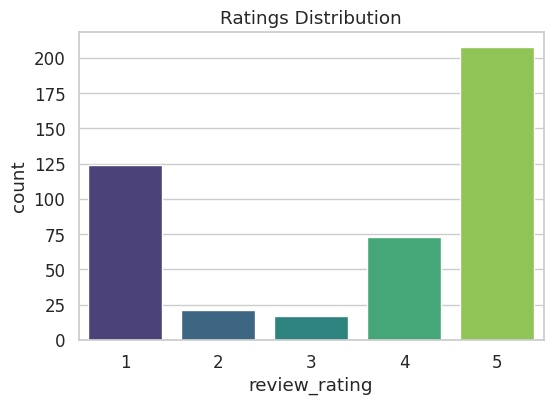

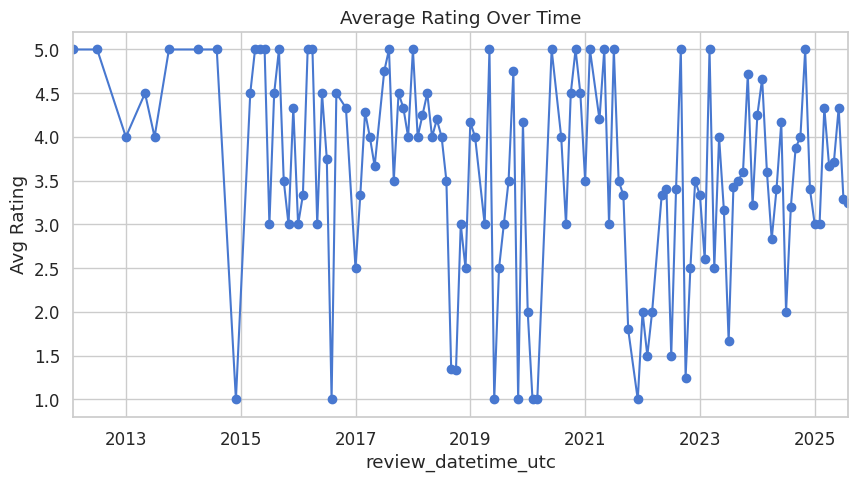

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="review_rating", data=df, palette="viridis")
plt.title("Ratings Distribution")
plt.show()

df.groupby(df['review_datetime_utc'].dt.to_period("M"))['review_rating'].mean().plot(figsize=(10,5), marker="o")
plt.title("Average Rating Over Time")
plt.ylabel("Avg Rating")
plt.show()


# 💬 3. Sentiment Analysis

/var/tmp/ipykernel_5159/3429959399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_group", data=df, order=["Negative","Neutral","Positive"], palette="coolwarm")


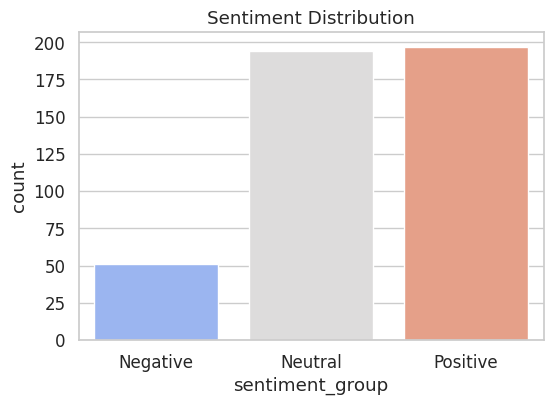

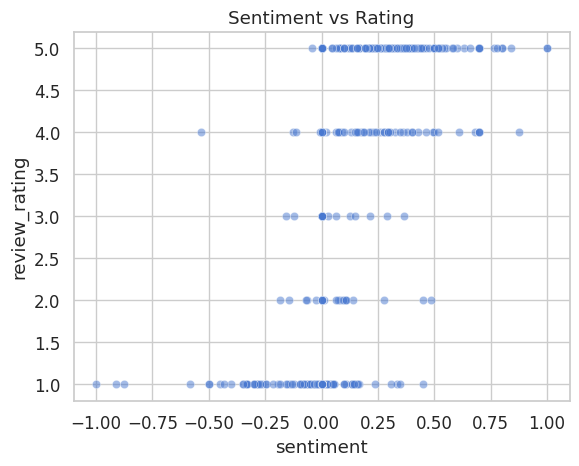

In [26]:
df['sentiment_group'] = pd.cut(df['sentiment'], bins=[-1,-0.05,0.05,1], labels=["Negative","Neutral","Positive"])

plt.figure(figsize=(6,4))
sns.countplot(x="sentiment_group", data=df, order=["Negative","Neutral","Positive"], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

sns.scatterplot(x="sentiment", y="review_rating", data=df, alpha=0.5)
plt.title("Sentiment vs Rating")
plt.show()


# ✍️ 4. Review Length & Engagement

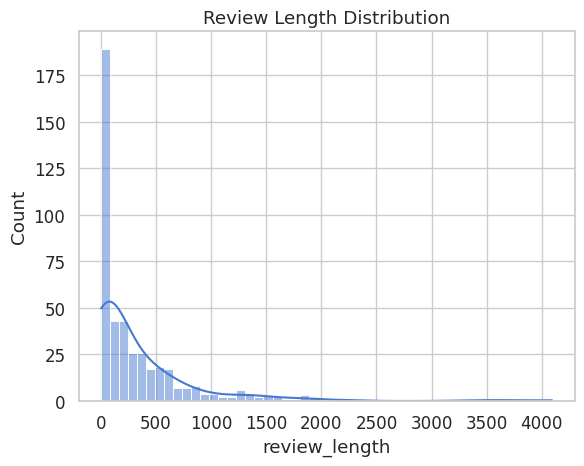

/var/tmp/ipykernel_5159/2932125478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="review_rating", y="review_length", data=df, palette="magma")


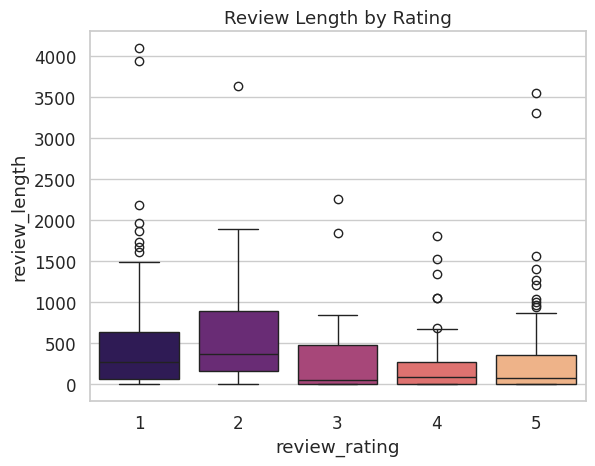

In [27]:
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.show()

sns.boxplot(x="review_rating", y="review_length", data=df, palette="magma")
plt.title("Review Length by Rating")
plt.show()


# 👥 5. Reviewer Behavior

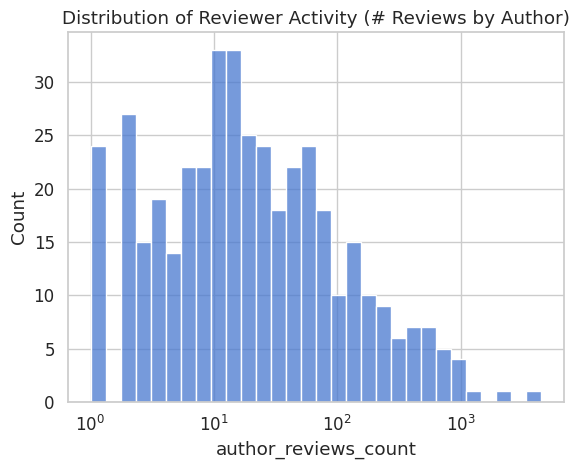

/var/tmp/ipykernel_5159/3163081248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_frequent", y="review_rating", data=df, palette="Set2")


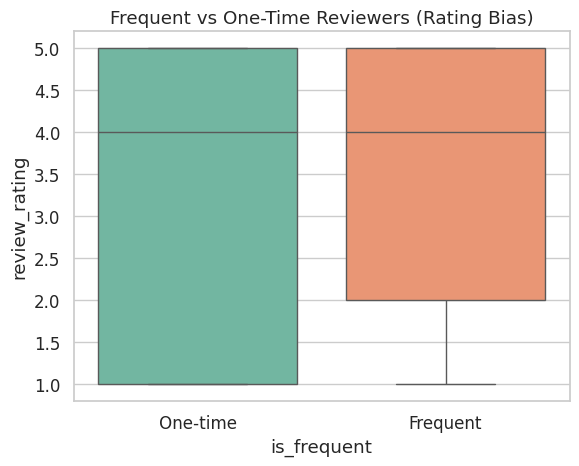

In [28]:
sns.histplot(df['author_reviews_count'], bins=30, log_scale=True)
plt.title("Distribution of Reviewer Activity (# Reviews by Author)")
plt.show()

df['is_frequent'] = df['author_reviews_count'] > 5
sns.boxplot(x="is_frequent", y="review_rating", data=df, palette="Set2")
plt.title("Frequent vs One-Time Reviewers (Rating Bias)")
plt.xticks([0,1], ["One-time","Frequent"])
plt.show()


# 🔁 6. Owner Response Behavior

/var/tmp/ipykernel_5159/3810842962.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_rating", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="crest")


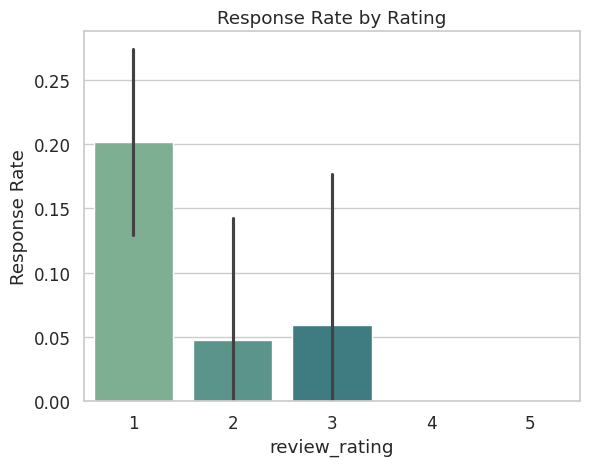

/var/tmp/ipykernel_5159/3810842962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sentiment_group", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="rocket")


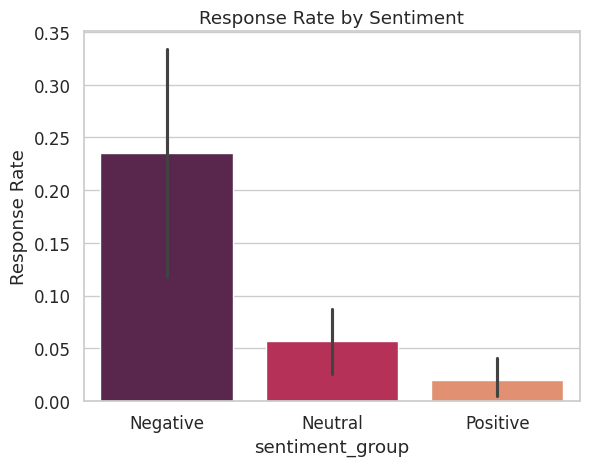

In [29]:
sns.barplot(x="review_rating", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="crest")
plt.title("Response Rate by Rating")
plt.ylabel("Response Rate")
plt.show()

sns.barplot(x="sentiment_group", y=df['owner_answer'].notna(), data=df, estimator=np.mean, palette="rocket")
plt.title("Response Rate by Sentiment")
plt.ylabel("Response Rate")
plt.show()


# ☁️ 7. Word Cloud & Keywords

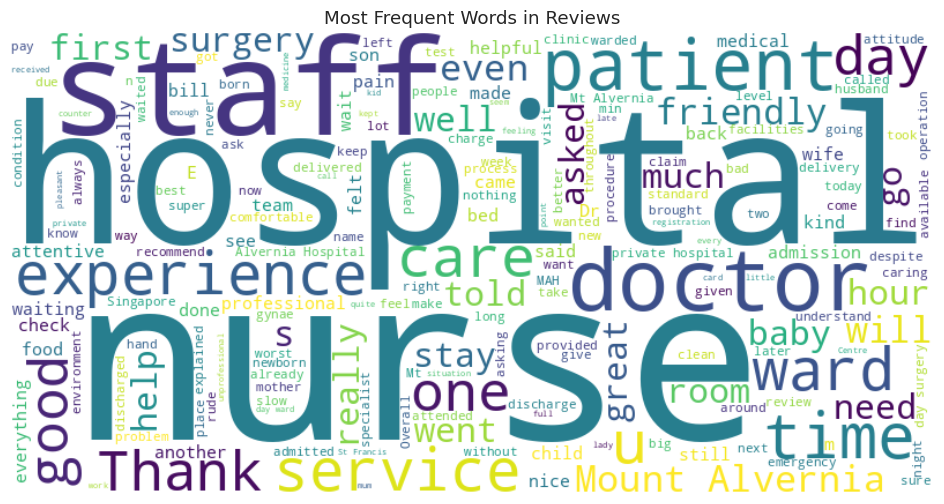

Top Keywords:
        keyword      score
7     hospital  69.999153
15       staff  40.855664
12      nurses  40.658625
6         good  30.511312
5   experience  29.250566
14     service  26.299142
1         care  26.203431
19        ward  25.329341
11       nurse  25.328980
0     alvernia  22.130515
3       doctor  21.484870
18        time  20.690734
16     surgery  19.906174
17       thank  18.270738
13     patient  18.246380
10       mount  17.776889
9         like  17.653533
2          day  17.577060
8         just  15.901882
4           dr  11.730378


In [30]:
text = " ".join(df['review_text'].dropna().astype(str).values)

wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()

# TF-IDF Keywords
tfidf = TfidfVectorizer(stop_words='english', max_features=20, ngram_range=(1,2))
tfidf_matrix = tfidf.fit_transform(df['review_text'].dropna().astype(str))
keywords = pd.DataFrame({
    "keyword": tfidf.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
}).sort_values(by="score", ascending=False)

print("Top Keywords:\n", keywords)


# 🗝 8. Topic Modeling (LDA)

In [31]:
cv = CountVectorizer(stop_words='english', max_df=0.9, min_df=5)
cv_matrix = cv.fit_transform(df['review_text'].dropna().astype(str))

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(cv_matrix)

def display_topics(model, feature_names, no_top_words=8):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx+1}: ", [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

display_topics(lda, cv.get_feature_names_out())


Topic 1:  ['hospital', 'nurses', 'staff', 'alvernia', 'service', 'care', 'ward', 'good']
Topic 2:  ['hospital', 'staff', 'nurses', 'doctor', 'alvernia', 'service', 'medical', 'time']
Topic 3:  ['nurse', 'nurses', 'asked', 'just', 'doctor', 'care', 'ward', 'experience']
Topic 4:  ['hospital', 'bus', 'shuttle', 'good', 'parking', 'wait', 'rude', 'hour']
Topic 5:  ['hospital', 'wait', 'ward', 'day', 'staff', 'told', 'registration', 'time']


# 📌 9. KPI Summary (Text Output)

In [32]:
summary = {
    "Average Rating": round(df['review_rating'].mean(),2),
    "Average Sentiment": round(df['sentiment'].mean(),2),
    "Response Rate (%)": round(df['owner_answer'].notna().mean()*100,2),
    "One-time Reviewer %": round((df['author_reviews_count'] == 1).mean()*100,2),
    "Frequent Reviewer %": round((df['author_reviews_count'] > 5).mean()*100,2),
    "Avg Review Length": round(df['review_length'].mean(),2),
    "Avg Likes": round(df['review_likes'].mean(skipna=True),2)
}
print("📊 KPI Dashboard:\n")
for k,v in summary.items():
    print(f"{k}: {v}")


📊 KPI Dashboard:

Average Rating: 3.5
Average Sentiment: 0.11
Response Rate (%): 6.09
One-time Reviewer %: 5.42
Frequent Reviewer %: 71.56
Avg Review Length: 338.79
Avg Likes: nan


In [33]:
# =============================
# 📌 9. Enhanced KPI Summary
# =============================

summary = {
    "Average Rating": round(df['review_rating'].mean(),2),
    "Average Sentiment": round(df['sentiment'].mean(),2),
    "Response Rate (%)": round(df['owner_answer'].notna().mean()*100,2),
    "One-time Reviewer %": round((df['author_reviews_count'] == 1).mean()*100,2),
    "Frequent Reviewer %": round((df['author_reviews_count'] > 5).mean()*100,2),
    "Avg Review Length": round(df['review_length'].mean(),2),
    "Avg Likes": round(df['review_likes'].mean(skipna=True),2)
}

# % Rating distribution
rating_dist = df['review_rating'].value_counts(normalize=True).sort_index() * 100
for rating, pct in rating_dist.items():
    summary[f"Rating {rating} %"] = round(pct,2)

# % Sentiment distribution
sentiment_dist = df['sentiment_group'].value_counts(normalize=True) * 100
for sentiment, pct in sentiment_dist.items():
    summary[f"{sentiment} Sentiment %"] = round(pct,2)

print("📊 KPI Dashboard:\n")
for k,v in summary.items():
    print(f"{k}: {v}")


📊 KPI Dashboard:

Average Rating: 3.5
Average Sentiment: 0.11
Response Rate (%): 6.09
One-time Reviewer %: 5.42
Frequent Reviewer %: 71.56
Avg Review Length: 338.79
Avg Likes: nan
Rating 1 %: 27.99
Rating 2 %: 4.74
Rating 3 %: 3.84
Rating 4 %: 16.48
Rating 5 %: 46.95
Positive Sentiment %: 44.57
Neutral Sentiment %: 43.89
Negative Sentiment %: 11.54


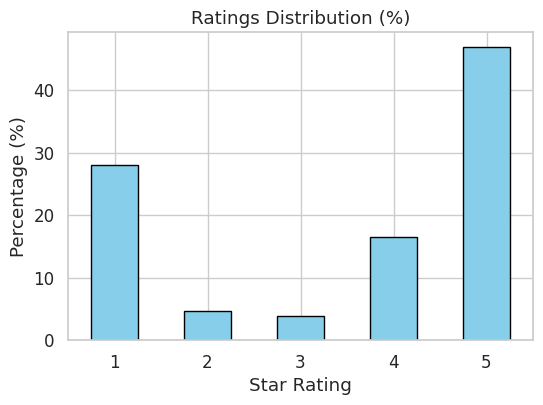

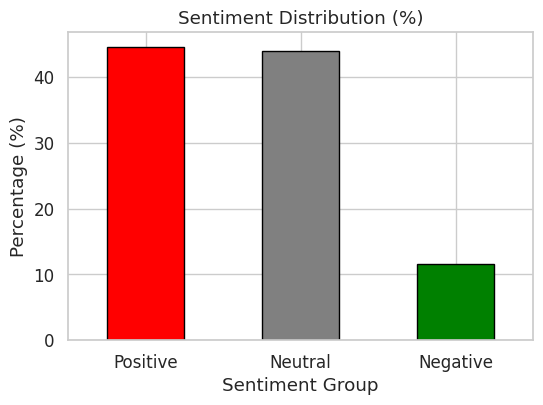

In [34]:
import matplotlib.pyplot as plt

# =============================
# 📊 10. KPI Visualizations
# =============================

# --- Ratings Distribution ---
rating_dist = df['review_rating'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
rating_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Ratings Distribution (%)")
plt.xlabel("Star Rating")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

# --- Sentiment Distribution ---
sentiment_dist = df['sentiment_group'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sentiment_dist.plot(kind='bar', color=['red','grey','green'], edgecolor='black')
plt.title("Sentiment Distribution (%)")
plt.xlabel("Sentiment Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()


In [35]:
# =============================
# 📌 11. Top Positive & Negative Reviews
# =============================

# Sort by sentiment score
top_positive = df.sort_values(by='sentiment', ascending=False).head(10)[['review_text','review_rating','sentiment']]
top_negative = df.sort_values(by='sentiment', ascending=True).head(10)[['review_text','review_rating','sentiment']]

print("🔥 Top 10 Positive Reviews (by sentiment):\n")
for i, row in top_positive.iterrows():
    print(f"⭐ Rating: {row['review_rating']} | Sentiment: {round(row['sentiment'],2)}")
    print(row['review_text'])
    print("-"*80)

print("\n⚠️ Top 10 Negative Reviews (by sentiment):\n")
for i, row in top_negative.iterrows():
    print(f"⭐ Rating: {row['review_rating']} | Sentiment: {round(row['sentiment'],2)}")
    print(row['review_text'])
    print("-"*80)


🔥 Top 10 Positive Reviews (by sentiment):

⭐ Rating: 5 | Sentiment: 1.0
We had picnic on the field beside it scenery was breathtaking
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 1.0
The best hospital in Town.
--------------------------------------------------------------------------------
⭐ Rating: 4 | Sentiment: 0.88
A Good one!
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 0.84
Mount A is good service for OT booking and everything they can handle and when my clinic call &WA to book they very good 👍🏻 and nurse service very good too when I give birth my child
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 0.8
Had a great experience re their Health Screening. Would recommend.
--------------------------------------------------------------------------------
⭐ Rating: 5 | Sentiment: 0.8
The staffs are genuinely 

In [36]:
rating_dist

review_rating
1    27.990971
2     4.740406
3     3.837472
4    16.478555
5    46.952596
Name: proportion, dtype: float64

In [37]:
# --- Base KPI Metrics ---
kpi_data = {
    "Average Rating": round(df['review_rating'].mean(),2),
    "Average Sentiment": round(df['sentiment'].mean(),2),
    "Response Rate (%)": round(df['owner_answer'].notna().mean()*100,2),
    "One-time Reviewer %": round((df['author_reviews_count'] == 1).mean()*100,2),
    "Frequent Reviewer %": round((df['author_reviews_count'] > 5).mean()*100,2),
    "Avg Review Length": round(df['review_length'].mean(),2),
    "Avg Likes": round(df['review_likes'].mean(skipna=True),2)
}

# Rating % Distribution
rating_dist = df['review_rating'].value_counts(normalize=True).sort_index() * 100
for rating, pct in rating_dist.items():
    kpi_data[f"Rating {rating} %"] = round(pct,2)

# Sentiment % Distribution
sentiment_dist = df['sentiment_group'].value_counts(normalize=True) * 100
for sentiment, pct in sentiment_dist.items():
    kpi_data[f"{sentiment} Sentiment %"] = round(pct,2)

# --- Top Reviews Extraction ---
top_positive = df.sort_values(by='sentiment', ascending=False).head(10)[['review_text','review_rating','sentiment']]
top_negative = df.sort_values(by='sentiment', ascending=True).head(10)[['review_text','review_rating','sentiment']]

# Convert reviews into a single string (shortened for table)
pos_reviews_str = "\n\n".join([f"⭐{row['review_rating']} (sent={round(row['sentiment'],2)}): {row['review_text'][:150]}..." 
                               for _,row in top_positive.iterrows()])

neg_reviews_str = "\n\n".join([f"⭐{row['review_rating']} (sent={round(row['sentiment'],2)}): {row['review_text'][:150]}..." 
                               for _,row in top_negative.iterrows()])

# Add to KPI data
kpi_data["Top 10 Positive Reviews"] = pos_reviews_str
kpi_data["Top 10 Negative Reviews"] = neg_reviews_str

# --- Final KPI Table ---
kpi_df = pd.DataFrame(list(kpi_data.items()), columns=["Metric","Value"])

# Replace the custom module with standard pandas display
# Instead of: import caas_jupyter_tools
# Instead of: caas_jupyter_tools.display_dataframe_to_user("KPI Dashboard with Reviews", kpi_df)
display(kpi_df)  # This is the standard way to display dataframes in Jupyter notebooks

,Metric,Value
0,Average Rating,3.5
1,Average Sentiment,0.11
2,Response Rate (%),6.09
3,One-time Reviewer %,5.42
4,Frequent Reviewer %,71.56
5,Avg Review Length,338.79
6,Avg Likes,NaN
7,Rating 1 %,27.99
8,Rating 2 %,4.74
9,Rating 3 %,3.84


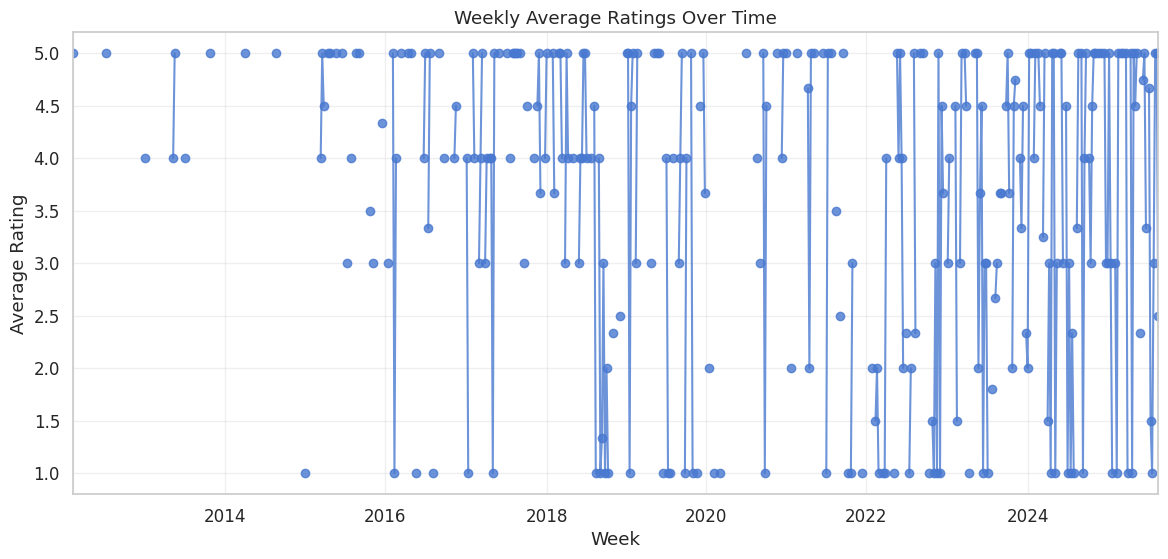

In [38]:
# =============================
# 📊 Weekly Ratings Trend
# =============================

# Ensure datetime is parsed
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'], errors='coerce')

# Resample weekly average ratings
weekly_ratings = df.set_index('review_datetime_utc').resample('W')['review_rating'].mean()

# Plot
plt.figure(figsize=(14,6))
weekly_ratings.plot(marker='o', linewidth=1.5, alpha=0.8)
plt.title("Weekly Average Ratings Over Time")
plt.xlabel("Week")
plt.ylabel("Average Rating")
plt.grid(True, alpha=0.3)
plt.show()


In [1]:
import base64
import pandas as pd
import json
import vertexai
import tiktoken # A popular tokenizer, though not directly from google-generativeai
import time
from vertexai.generative_models import GenerativeModel, Part, SafetySetting
import warnings
warnings.filterwarnings("ignore")

project_name = !(gcloud config get-value core/project)
project_name = project_name[0]


In [2]:

#Gemini
class LLM_model:
    def __init__(self, project, location, model_name):
        self.project = project
        self.location = location
        self.model_name = model_name
        self.generation_config = {
            "max_output_tokens": 8192,
            "temperature": 1,
            "top_p": 0.95,
        }
        self.safety_settings = [
            SafetySetting(
                category=SafetySetting.HarmCategory.HARM_CATEGORY_HATE_SPEECH,
                threshold=SafetySetting.HarmBlockThreshold.OFF
            ),
            SafetySetting(
                category=SafetySetting.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT,
                threshold=SafetySetting.HarmBlockThreshold.OFF
            ),
            SafetySetting(
                category=SafetySetting.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT,
                threshold=SafetySetting.HarmBlockThreshold.OFF
            ),
            SafetySetting(
                category=SafetySetting.HarmCategory.HARM_CATEGORY_HARASSMENT,
                threshold=SafetySetting.HarmBlockThreshold.OFF
            ),
        ]
        vertexai.init(project=self.project, location=self.location)
        self.model = GenerativeModel(self.model_name)

    def complete(self, text):
        chat = self.model.start_chat()
        result=chat.send_message([text],
                                 generation_config=self.generation_config,
                                 safety_settings=self.safety_settings
        )
        text_result=result.candidates[0].content.parts[0].text
        return text_result
# Example usage:
llm_gemini = LLM_model(project_name, 
                       "us-central1", 
                       "gemini-2.5-pro")


In [3]:
def sentiment_analysis(feedback, llm, llm_type='gemini'):
    prompt = f"""
    Role: You are an AI Specialist analysing customer feedback from Google reviews. Your role is to understand the given context
    and perform the task provided as appropriately.

    Context: The feedbacks are given by the patients or the bystanders of patients who went for treatment to the hospital.

    Task:
    1. Analyze the sentiment of the customer feedback if it’s positive, negative, or neutral.
    2. If the feedback is neither positive nor negative but just neutrally stating an info or suggestion,
       or is a non-meaningful feedback like 'Yes', 'No', 'Nil', 'na', 'N:A', 'N/a', 'n/a',
       'not applicable' or 'no comment', the sentiment is neutral.
    3. If sentiment is positive, return 'Positive'.
    4. If sentiment is negative, return 'Negative'.
    5. If sentiment is neutral, return 'Neutral'. Do not include other words or explanation.

    This is the customer feedback: {feedback}

    Examples:
    Its convenient, easy, fast: Positive.
    Nil: Neutral.
    Customer service not professional: Negative.
    
    Output:
    1. provide the classification of sentiment - Positive, Negative, Neutral   
    
    """

    try:
        if llm_type == 'gemini':
            result = llm.complete(prompt)
        else:
            result = llm.complete(prompt).text
        return result.strip()
    except Exception as e:
        print(f"Error processing row: {e}")
        return None  # Use None unless you're sure np.nan is needed and numpy is imported


In [4]:
def Information_extraction(feedback, llm, llm_type='gemini'):
    prompt = f"""
    Role: You are an AI Specialist analysing customer feedback from Google reviews. Your role is to understand the given context
    and perform the task provided as appropriately.

    Context: The feedbacks are given by the patients or the bystanders of patients who went for treatment to the hospital.

    Task:
    1. Analyze the feedback from the below mentioned topics and extract the information and provide as an output. If 
    the topics not found, mention as not found.
    1.1 From the whole feedback, extract the core issue, summarize the patient experience in 5 words and then
    follow the below tasks.
    2. Hospital Topic: 
        a. Does the review mention a specific ward, block or room number? if yes, extract it.
        b. Does the review mention about the department e.g: Endoscopy, Pharmacy, etc., if yes, extract it.
        c. Does the review describe whether the hospital is old, upgraded or modern?
    3. Staff & Service Topic:
        a. Does the review mention Doctors? if yes, extract it.
        b. Does the review mention nurses? if yes, extract it.
        c. Does the review mention support or admin staff? if yes, extract it.
        d. Does the review mention specific staff names? Extract them.
    4. Patient Experience:
        a. Does the review mention specific treatments or medical procedures (e.g. delivery, surgery)?
        b. What aspects of service quality are highlighted (e.g. attentiveness, professionalism, rudeness)?
        c. Does the reviewer mention waiting time? if yes, how long?
        d. Does the review mention food quality or any other quality (e.g. bedsheets, bathroom or cafeteria)?
    5. Complaints & Negative Aspects:
        a. Does the reviewer mention rude staff? Extract the details.
        b. Does the reviewer mention delays, long queues or poor management? Extract waiting times if given.
        c. Does the review mention unfair rules or inconsistent policies (e.g. visitor entry)?
        d. Does the reviewer explicitly call the hospital horrible, worst, terrifying, or disappointing?
        e. Does the review suggest profit motive or unnecessary procedures?
        f. Does the reviewer perceive fraudulent activity from the hospital?
    6. For each of the topics and its sub questions, provide output. If not found, mention as "Not found in feedback"

    This is the customer feedback: {feedback}

    Output:
    1. Provide the output in key-value pairs as JSON.
    2. Keys are only the core issue, summary, and the sub-questions (topic names not required).
    3. Values are the extracted output from the feedback.
    """

    # Token estimation
    try:
        import tiktoken
        enc = tiktoken.get_encoding("cl100k_base")
        prompt_tokens = len(enc.encode(prompt))
        print(f"Estimated input tokens (prompt): {prompt_tokens}")
    except ImportError:
        print("Install 'tiktoken' (pip install tiktoken) for token estimation.")
        prompt_tokens = -1

    # LLM completion
    try:
        if llm_type == 'gemini':
            result = llm.complete(prompt)
        else:
            result = llm.complete(prompt).text
        result = result.strip()
    except Exception as e:
        print(f"Error processing row: {e}")
        return None

    # Token estimation for response
    try:
        response_tokens = len(enc.encode(result))
        print(f"Estimated output tokens (response): {response_tokens}")
    except Exception:
        response_tokens = -1

    # Total token count
    if prompt_tokens != -1 and response_tokens != -1:
        total_estimated_tokens = prompt_tokens + response_tokens
        print(f"Total estimated tokens (prompt + response): {total_estimated_tokens}")

    return result

In [5]:
# Load dataset
df_MtAlv = pd.read_excel("Mount Alvernia hospital.xlsx")

# Display basic info
print(df_MtAlv.shape)
df_MtAlv.head()

(443, 35)


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2xOSU9UVlROVGRxYVhGTV...,CAESYENBRVFBUnBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMk...,...,4,1755854070,08/22/2025 09:14:30,NaN,-7398584239094758513,124,21,17,73,208
1,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2pkaWEzUnBOMWRPYWxZMV...,CAESYENBRVFBaHBDUTJrNFNVRlNTVzVEWjI5QlVEY3lSMk...,...,3,1755852758,08/22/2025 08:52:38,NaN,-7398584239094758513,124,21,17,73,208
2,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2tOU1RWTlpSRmxtYVVoUk...,CAESY0NBRVFBeHBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMk...,...,2,1755657053,08/20/2025 02:30:53,NaN,-7398584239094758513,124,21,17,73,208
3,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT2xCTVgxbzRjazU1Y2tsc2...,CAESY0NBRVFCQnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMk...,...,1,1755646525,08/19/2025 23:35:25,NaN,-7398584239094758513,124,21,17,73,208
4,0x31da1746cc0725d3:0x9952f2d57bf4038f,Mount Alvernia Hospital,0x31da1746cc0725d3:0x9952f2d57bf4038f,ChIJ0yUHzEYX2jERjwP0e9XyUpk,https://www.google.com/maps/place/Mount+Alvern...,https://search.google.com/local/reviews?placei...,443,3.5,Ci9DQUlRQUNvZENodHljRjlvT25RMGJXZG5NVzlNU1hCTU...,CAESY0NBRVFCUnBFUTJwRlNVRlNTWEJEWjI5QlVEY3lSMl...,...,5,1755270597,08/15/2025 15:09:57,NaN,-7398584239094758513,124,21,17,73,208


In [6]:
with open("text_reviews_MountAlv.txt", "w", encoding="utf-8") as f:
    for i, row in df_MtAlv.iterrows():
        f.write(f"--- Review #{i + 1} ---\n")
        f.write(f"Datetime: {row['review_datetime_utc']}\n")
        f.write(f"User: {row['author_title']}\n")
        f.write(f"Review: {row['review_text']}\n")
        f.write("--- End of Review ---\n\n")

In [7]:
df_MtAlv.head().transpose()


df_MtAlv_reviewtext = df_MtAlv.review_text


df_MtAlv_reviewtext.iloc[1:10]

1    Amazing check in process.\nHad to wait half an...
2    AOSC got to work on their time management. We ...
3    在这边住院我感觉自己像罪犯，六人病房每天定时被要求拉开床帘，抽屉的东西还会未经同意被护士全拿...
4    Delivering at Mt Alvernia was the best decisio...
5    Underwent an op and was warded for a 2 night s...
6    The staff are so caring and attentive towards ...
7    I had a surgery here. Won’t go into details bu...
8    非常感谢这两天对我爸爸的照顾，今天也是爸爸的生日，没想到出院前还给我爸爸过了一个难忘的生日！...
9    At first was told by nurse that the report wou...
Name: review_text, dtype: object

In [8]:
import json
import fitz  # PyMuPDF
counter = 0
# Assuming df_Gleangles_reviewtext and Information_extraction are already defined
with open("review_output_MtAlvernia.txt", "w", encoding="utf-8") as f:
    for idx,review in enumerate(df_MtAlv_reviewtext,start=0):
        
        start_time = time.time()
        print(f"Processing row {idx}...")

        example_output = Information_extraction(review, llm_gemini)
        o = example_output.replace('```', '')
        
        cleaned_output = o.replace('json', '')
        
        
        try:
            # If the output contains extra text before/after JSON, isolate the JSON part
            start = cleaned_output.find('{')
            end = cleaned_output.rfind('}') + 1
            json_str = cleaned_output[start:end]

            # Parse the JSON
            ie_output_dict = json.loads(json_str)
        except json.JSONDecodeError as e:
            print("JSON decoding failed:", e)
            print("Raw output:", cleaned_output)
            ie_output_dict = None

        
        f.write("Original Review:\n")
        f.write(str(review) + "\n")
        f.write("Extracted Information:\n")
        f.write(json.dumps(ie_output_dict, indent=4))
        f.write("\n---------------------------------------------------\n")

        f.write("Next Review ########################################\n\n")
        

        elapsed_time = time.time() - start_time
        print(f"Row {idx} processed in {elapsed_time:.2f} seconds.\n")


Processing row 0...
Estimated input tokens (prompt): 695
Estimated output tokens (response): 469
Total estimated tokens (prompt + response): 1164
Row 0 processed in 19.20 seconds.

Processing row 1...
Estimated input tokens (prompt): 593
Estimated output tokens (response): 310
Total estimated tokens (prompt + response): 903
Row 1 processed in 17.74 seconds.

Processing row 2...
Estimated input tokens (prompt): 749
Estimated output tokens (response): 643
Total estimated tokens (prompt + response): 1392
Row 2 processed in 24.68 seconds.

Processing row 3...
Estimated input tokens (prompt): 778
Estimated output tokens (response): 460
Total estimated tokens (prompt + response): 1238
Row 3 processed in 20.02 seconds.

Processing row 4...
Estimated input tokens (prompt): 855
Estimated output tokens (response): 390
Total estimated tokens (prompt + response): 1245
Row 4 processed in 12.07 seconds.

Processing row 5...
Estimated input tokens (prompt): 639
Estimated output tokens (response): 326